# Confronto tra Insertion Sort e Merge Sort

In questo notebook, eseguiremo un confronto dettagliato tra due algoritmi di ampiamente utilizzati: Insertion Sort e Merge Sort. Analizzeremo i vantaggi e gli svantaggi di ciascun algoritmo insieme alle loro prestazioni su dimensioni e dati diversi.

Per fare ciò verranno usate le seguenti librerie:
- **random** per generare *int* e *float* randomici.
- **timeit** per il calcolo accurato dei tempi di esecuzione.
- **statistics** e **numpy** per il calcolo della mediana e della deviazione standard.
- **tqdm** per la visualizzazione delle barre di progresso.
- **matplotlib** per la produzione dei grafici.
- **enum** e **typing** per definire una enumerazione e delle annotazioni di tipo.


In [2]:
from IPython.display import clear_output

import random
from timeit import default_timer as timer
import statistics
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

from enum import Enum
from typing import List, Tuple, Any, Callable

class Mode(Enum):
    INT = "int"
    FLOAT = "float"

DataPoints = List[Tuple[float, float]]

## 1. Metodologia di testing

In questa sezione sono definite le funzioni per:

* testare un algoritmo generico su delle strutture dati con certe `sizes`, per due tipi di dato (`int` e `float`) con un certo numero di iterazioni per ogni esecuzione, restituendo le mediane e deviazioni standard per ogni dimensione e tipo di dato.

* produrre un grafico a partire dai dati, con un certo titolo e una posizione nella griglia dei grafici; opzionalmente può calcolare i tempi relativi partendo dagli stessi dati, dividendoli uno a uno per la dimensione corrispondente nel test.





In [3]:
def test_algorithm(algorithm: Callable[[list[Any]], None], sizes: list[int], iterations: int) -> tuple[DataPoints, DataPoints]:
    sort_times: tuple[DataPoints, DataPoints] = ([], [])

    # Per i due tipi di dato
    for data_mode in [Mode.INT, Mode.FLOAT]:
        times = sort_times[0 if data_mode == Mode.INT else 1]
        # Per ogni dimensione
        for size in sizes:
            size_times = []
            iter_bar = tqdm(range(iterations), desc="Iterazioni per "+str(size)+" elementi ("+data_mode.value+")")

            # Per un certo numero di iterazioni
            for i in iter_bar:
                if data_mode == Mode.FLOAT:
                    data = [random.randint(1, 1000 if size < 1000 else size) for _ in range(size)]
                else:
                    data = [random.uniform(1, 1000 if size < 1000 else size) for _ in range(size)]

                start_time = timer()
                algorithm(data)
                end_time = timer()

                size_times.append(end_time - start_time)

            times.append((statistics.median(size_times), np.std(size_times).astype(float)))
            iter_bar.close()
            clear_output(wait=True)
    return sort_times;

def plot(sort_times: DataPoints, sizes: list[int], title: str, subplot: int, relative_times: bool = False) -> None:
    # Estrai i valori medi e le deviazioni standard per i grafici
    medians = [median for median, _ in sort_times]
    std_devs = [dev for _, dev in sort_times]

    # Normalizziamo le medie nel caso in cui volessimo i valori relativi
    if relative_times:
        for i, median in enumerate(medians):
            medians[i] = median / sizes[i]

    # Normalizziamo le deviazioni standard nel caso in cui volessimo i valori relativi
    for i, dev in enumerate(std_devs):
        if relative_times:
            std_devs[i] = dev / sizes[i]
        if medians[i] - std_devs[i] < 0:
            std_devs[i] = medians[i]

    # Creazione del grafico
    plt.subplot(2, 2, subplot)
    plt.errorbar(sizes, medians, yerr=std_devs, fmt='o-')
    plt.xlabel('Dimensione dell\'insieme di dati')
    plt.ylabel('Tempo (secondi)')
    plt.title(title)
    plt.grid(True)

## 2. Insertion Sort

L'Insertion Sort è un algoritmo di ordinamento semplice e intuitivo. Esso opera suddividendo la sequenza in una parte ordinata e una parte non ordinata, quindi inserisce iterativamente gli elementi dalla parte non ordinata nella parte ordinata. L'algoritmo è efficiente per piccoli insiemi di dati, ma la sua complessità cresce quadraticamente rispetto alla dimensione dell'input.

**Vantaggi di Insertion Sort:**

- **Facilità di implementazione**: È un algoritmo di ordinamento semplice da capire e implementare.
- **Efficiente per piccoli insiemi di dati o quando la sequenza è già parzialmente ordinata**: In casi in cui l'insieme di dati è di dimensioni limitate o già parzialmente ordinato, l'Insertion Sort può essere più veloce di altri algoritmi.

**Svantaggi di Insertion Sort:**

- **Complessità quadratica nel caso peggiore**: Nel caso in cui la sequenza sia inversamente ordinata o completamente disordinata, l'Insertion Sort richiederà un numero di confronti e spostamenti quadratici, rendendolo inefficace per grandi insiemi di dati.
- **Non adatto per insiemi di dati in cui è richiesto un ordinamento stabile**: L'Insertion Sort non mantiene l'ordine relativo degli elementi con chiavi uguali.

La complessità temporale dell'Insertion Sort può essere espressa in notazione Big O come $O(n^2)$ nel caso peggiore, dove $n$ è la dimensione dell'input. Nel caso migliore, quando la sequenza è già ordinata, la complessità è $O(n)$, il che significa che l'algoritmo è lineare nel caso migliore. Inoltre, il caso medio dell'Insertion Sort è anche $O(n^2)$, rendendolo un algoritmo meno efficiente rispetto a quelli con complessità inferiori. La notazione Theta può essere utilizzata per indicare il comportamento asintotico esatto dell'algoritmo, che è $\Theta(n^2)$ nel caso peggiore.

In [ ]:
# Implementazione di Insertion Sort
def insertion_sort(arr: list[Any]) -> None:
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

### 2.1 Test per insertion sort

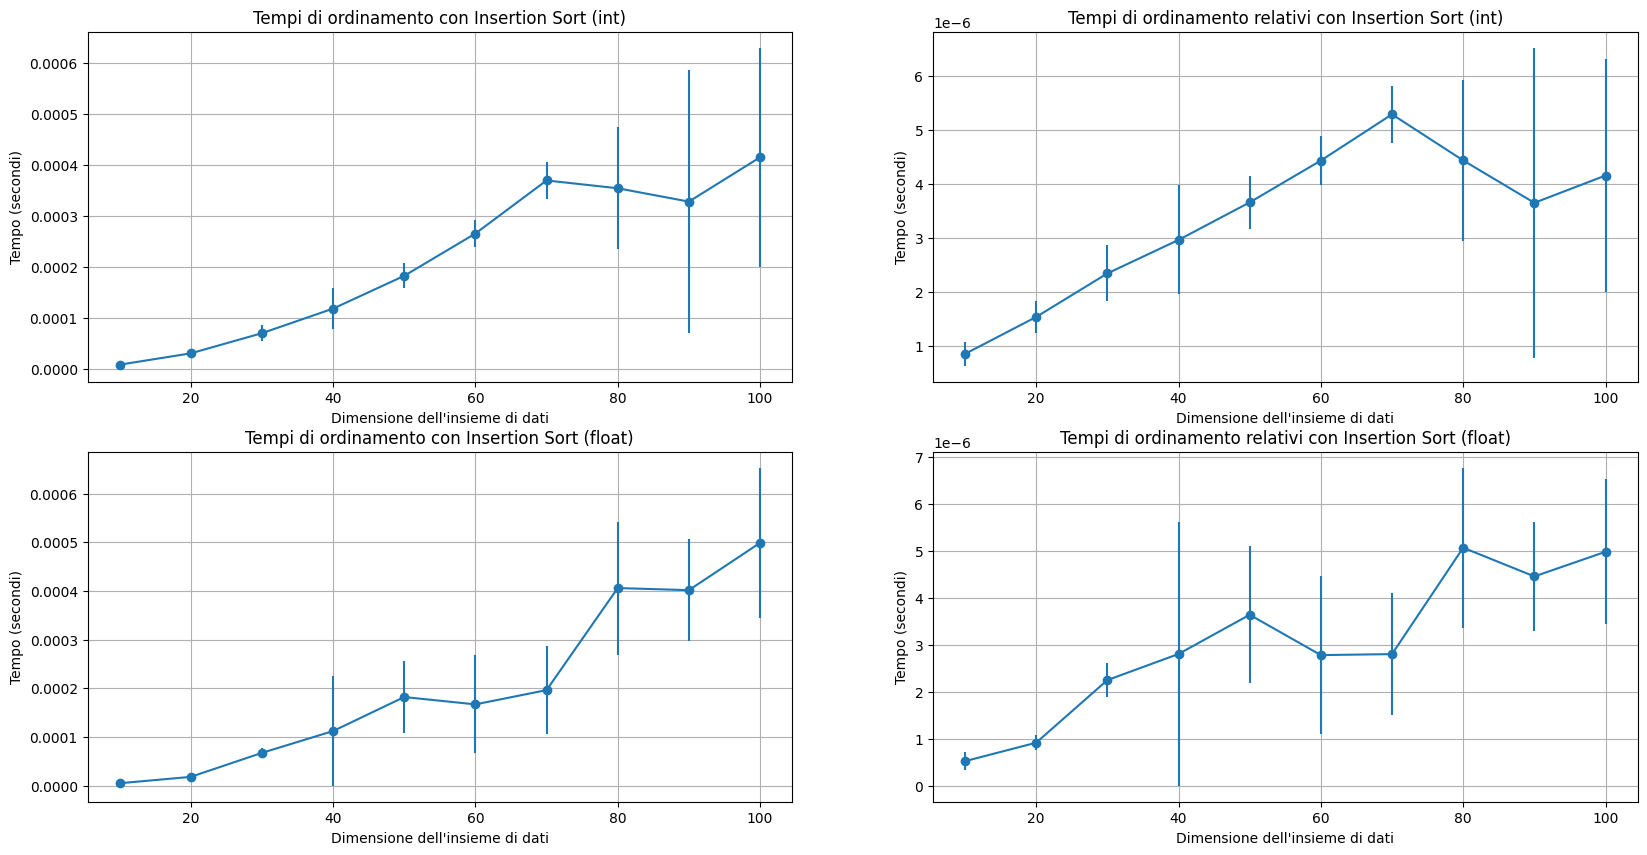

In [ ]:
sizes = [*np.arange(10, 110, 10)]
#sizes = [1000, 5000, 10000, 15000, 25000]
iterations = 20

insertion_sort_times = test_algorithm(insertion_sort, sizes, iterations)

plot(insertion_sort_times[0], sizes, title="Tempi di ordinamento con Insertion Sort (int)", subplot=1)
plot(insertion_sort_times[0], sizes, title="Tempi di ordinamento relativi con Insertion Sort (int)", subplot=2, relative_times=True)
plot(insertion_sort_times[1], sizes, title="Tempi di ordinamento con Insertion Sort (float)", subplot=3)
plot(insertion_sort_times[1], sizes, title="Tempi di ordinamento relativi con Insertion Sort (float)", subplot=4, relative_times=True)

## 3. Merge Sort

Il Merge Sort è un algoritmo di ordinamento basato sulla tecnica "divide et impera". Esso suddivide la sequenza in due parti, le ordina separatamente e quindi combina le due parti ordinate per produrre una sequenza ordinata completa. L'algoritmo ha una complessità temporale garantita di $O(n \log(n))$, il che lo rende efficiente per grandi insiemi di dati.

**Vantaggi di Merge Sort:**

- **Complessità temporale garantita di $O(n \log(n))$**: Il Merge Sort offre prestazioni affidabili, poiché la sua complessità rimane logaritmica rispetto alla dimensione dell'input, il che lo rende ideale per insiemi di dati di grandi dimensioni.
- **Adatto per insiemi di dati di grandi dimensioni**: A differenza di algoritmi con complessità quadratica, il Merge Sort è altamente efficiente per insiemi di dati di grandi dimensioni, grazie alla sua complessità logaritmica.
- **Ordinamento stabile**: Il Merge Sort mantiene l'ordine relativo degli elementi con chiavi uguali, rendendolo un ordinamento stabile.

**Svantaggi di Merge Sort:**

- **Complessità di implementazione leggermente più complessa rispetto all'Insertion Sort**: L'implementazione del Merge Sort richiede una logica più complessa rispetto a algoritmi come l'Insertion Sort, rendendo la sua realizzazione più intricata.

La complessità temporale del Merge Sort è $O(n \log(n))$, che rappresenta il caso peggiore, il caso migliore e il caso medio. La notazione Theta può essere utilizzata per indicare il comportamento asintotico esatto dell'algoritmo, confermando che la complessità è $\Theta(n \log(n))$ in ogni situazione. Questo rende il Merge Sort un algoritmo altamente efficiente per l'ordinamento di grandi insiemi di dati, con una complessità logaritmica garantita.

In [ ]:
# Implementazione di Merge Sort
def merge_sort(arr: list[Any]) -> None:
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)
        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1

### 3.1 Test per merge sort

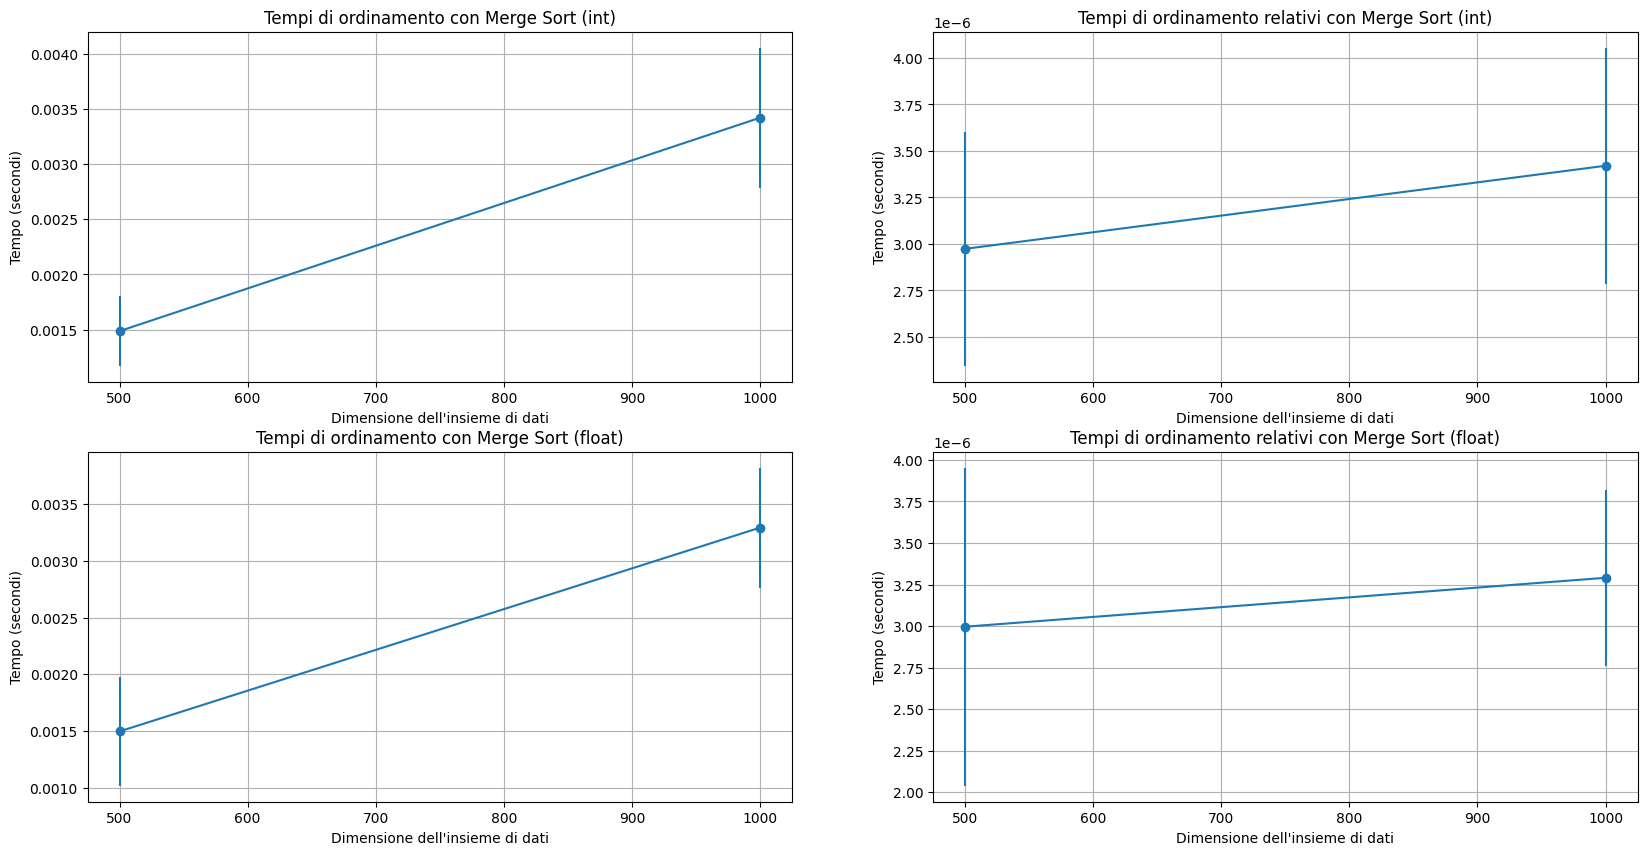

In [ ]:
sizes = [*np.arange(500, 1500, 500)]
#sizes = [1000, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 25000]
iterations = 250

merge_sort_times = test_algorithm(merge_sort, sizes, iterations)

plot(merge_sort_times[0], sizes, title="Tempi di ordinamento con Merge Sort (int)", subplot=1)
plot(merge_sort_times[0], sizes, title="Tempi di ordinamento relativi con Merge Sort (int)", subplot=2, relative_times=True)
plot(merge_sort_times[1], sizes, title="Tempi di ordinamento con Merge Sort (float)", subplot=3)
plot(merge_sort_times[1], sizes, title="Tempi di ordinamento relativi con Merge Sort (float)", subplot=4, relative_times=True)

## 3. Conclusione

Durante questo notebook, esamineremo i risultati di test ed esperimenti per entrambi gli algoritmi. Confronteremo le loro prestazioni in termini di tempo di esecuzione e analizzeremo come si comportano su insiemi di dati di dimensioni diverse. Questo ci consentirà di capire meglio quando è appropriato utilizzare l'Insertion Sort e quando il Merge Sort è la scelta migliore. Cominciamo con l'implementazione e i test dell'Insertion Sort.